In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('/content/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [6]:
df['Class'].isnull().sum()

np.int64(0)

visualizing the imabalances

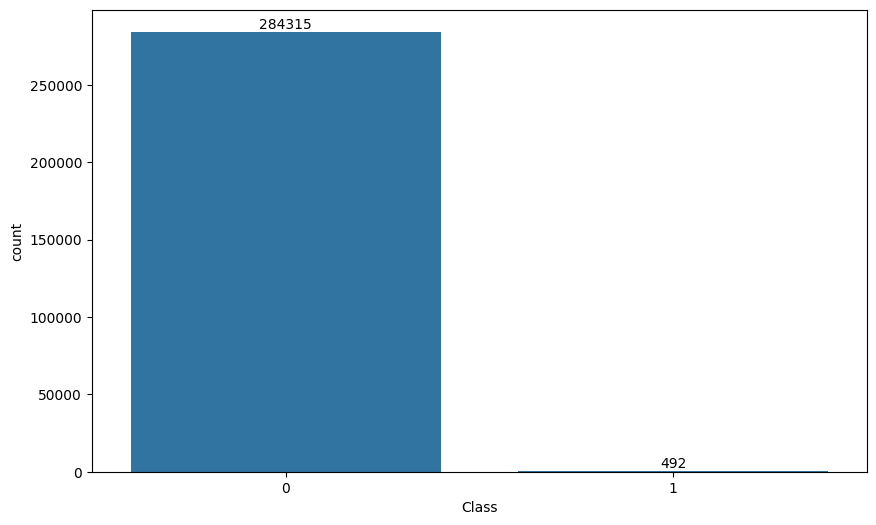

In [7]:
plt.figure(figsize=(10,6))
graph =sns.countplot(x='Class',data=df)#basically this is barplot
graph.bar_label(graph.containers[0])

plt.show()

In [8]:
#to find the percentage of fraudulance in dataset
fraud_count = np.sum(df['Class'].values == 1)
fraud_percent = (fraud_count/len(df['Class'].values))*100
print(f"{fraud_percent:.2f}")

0.17


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [10]:
objct = StandardScaler()

In [11]:
df['Amount'] = objct.fit_transform(df[['Amount']])
df['Time'] = objct.fit_transform(df[['Time']])

In [12]:
X = df.drop(columns = 'Class')
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
print(f"Train size: {len(X_train)}")
print(f"Test size: {len(X_test)}")

Train size: 227845
Test size: 56962


In [13]:
# here  only 0.17 % fraud cases of my data, mode cant predict which is fraud, so we use SMOTE(Synthetic Minority Over-sampling Technique)
#this will create synthetic  example for training only

In [15]:
from imblearn.over_sampling import SMOTE

In [16]:
sm = SMOTE(random_state=42)

In [17]:
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print(f"Original Training Fraud Count: {sum(y_train == 1)}")
print(f"Resampled Training Fraud Count: {sum(y_train_res == 1)}")

Original Training Fraud Count: 394
Resampled Training Fraud Count: 227451


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix


In [19]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs = -1)
print("training the forest")
rf_model.fit(X_train_res, y_train_res)
y_pred = rf_model.predict(X_test)# now i am making prediction on test datas

training the forest


In [20]:
print("\n--- Model Evaluation ---")
print(classification_report(y_test, y_pred))


--- Model Evaluation ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.84      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962



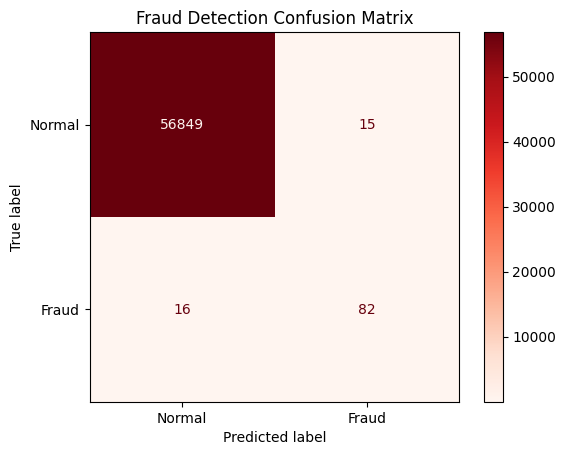

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# This shows exactly how many frauds were caught vs missed
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap='Reds', display_labels=['Normal', 'Fraud'])
plt.title("Fraud Detection Confusion Matrix")
plt.show()

In [ ]:
import joblib


joblib.dump(rf_model, 'fraud_model.pkl')
print("Model saved successfully as fraud_model.pkl")

Model saved successfully as fraud_model.pkl
